In [64]:
# pip install plotly

In [65]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import os 
import json
import requests
import hvplot.pandas
import plotly.express as px

# Import API key
from api_keys import geoapify_key

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [66]:
# Add new cleaned csv files with NA columns removed 
amazon_data = Path("Amazon_Prime_data/amazon_cleaned.csv")
apple_data = Path("Apple_data/apple_cleaned.csv")
hulu_data = Path("Hulu_data/hulu_cleaned.csv")
hbo_data = Path("HBO_data/hbo_cleaned.csv")
netflix_data = Path("Netflix_data/netflix_cleaned.csv")

# Load the data and read into DataFrames
amazon_data_df = pd.read_csv(amazon_data)
apple_data_df = pd.read_csv(apple_data)
hulu_data_df = pd.read_csv(hulu_data)
hbo_data_df = pd.read_csv(hbo_data)
netflix_data_df = pd.read_csv(netflix_data)


In [67]:
# Show the first 5 rows of each the DataFrame for Amazon 
amazon_data_df.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries
0,Blondie,movie,"Comedy, Family",1938,6.9,ZA
1,Four Rooms,movie,Comedy,1995,6.7,"AT, DE"
2,Judgment Night,movie,"Action, Crime, Drama",1993,6.6,"AR, BO, BR, CL, CO, CR, EC, GT, HN, MX, PA, PE..."
3,Forrest Gump,movie,"Drama, Romance",1994,8.8,"AD, CU, FR, GB, GF, GG, GI, IE, IN, JP, MC, PF..."
4,Citizen Kane,movie,"Drama, Mystery",1941,8.3,"AD, CA, ES, IN, JP"


In [68]:
# Apple Data
apple_data_df.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries
0,Four Rooms,movie,Comedy,1995,6.7,DE
1,Forrest Gump,movie,"Drama, Romance",1994,8.8,"AU, CA, US"
2,American Beauty,movie,Drama,1999,8.3,"AT, CH, DE, FR, GB, IE, IT"
3,Citizen Kane,movie,"Drama, Mystery",1941,8.3,"DE, GB"
4,Metropolis,movie,"Drama, Sci-Fi",1927,8.3,GB


In [69]:
# Hulu Data
hulu_data_df.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries
0,Ariel,movie,"Comedy, Crime, Romance",1988,7.4,JP
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986,7.5,JP
2,Forrest Gump,movie,"Drama, Romance",1994,8.8,JP
3,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,7.6,JP
4,My Life Without Me,movie,"Drama, Romance",2003,7.4,JP


In [70]:
# HBO Data
hbo_data_df.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,"DK, FI, NO, SE"
1,Jarhead,movie,"Biography, Drama, War",2005.0,7.0,"HK, ID, MY, PH, SG, TH, TW"
2,Unforgiven,movie,"Drama, Western",1992.0,8.2,"AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR, DO..."
3,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,8.3,"AG, AR, BB, BO, BS, BZ, CL, CO, CR, DO, EC, GT..."
4,A History of Violence,movie,"Action, Crime, Drama",2005.0,7.4,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."


In [71]:
# Netflix Data
netflix_data_df.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,7.6,"AT, CH, DE"
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,8.2,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CI, CM, CZ..."
2,Jarhead,movie,"Biography, Drama, War",2005,7.0,"AD, AE, AG, AO, BH, BM, BS, BZ, CI, CM, CO, CR..."
3,Unforgiven,movie,"Drama, Western",1992,8.2,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004,8.3,"AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, BG..."


In [72]:
# Add a new column to identify the streaming service
amazon_data_df["Streaming Service"] = "Amazon"
apple_data_df["Streaming Service"] = "Apple"
hulu_data_df["Streaming Service"] = "Hulu"
hbo_data_df["Streaming Service"] = "HBO"
netflix_data_df["Streaming Service"] = "Netflix"

# Combine all the dataframes into one DataFrame
all_data = pd.concat([amazon_data_df, apple_data_df, hulu_data_df, hbo_data_df, netflix_data_df], join='inner')

# Create new column for each streaming service within the new DataFrame
all_data.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries,Streaming Service
0,Blondie,movie,"Comedy, Family",1938.0,6.9,ZA,Amazon
1,Four Rooms,movie,Comedy,1995.0,6.7,"AT, DE",Amazon
2,Judgment Night,movie,"Action, Crime, Drama",1993.0,6.6,"AR, BO, BR, CL, CO, CR, EC, GT, HN, MX, PA, PE...",Amazon
3,Forrest Gump,movie,"Drama, Romance",1994.0,8.8,"AD, CU, FR, GB, GF, GG, GI, IE, IN, JP, MC, PF...",Amazon
4,Citizen Kane,movie,"Drama, Mystery",1941.0,8.3,"AD, CA, ES, IN, JP",Amazon


In [73]:
# IMDB average rating for each streaming service 
imdb_rating = all_data.groupby("Streaming Service")["IMDB Average Rating"].mean().reset_index()
imdb_rating

,Streaming Service,IMDB Average Rating
0,Amazon,5.953446
1,Apple,6.385585
2,HBO,6.688892
3,Hulu,6.566648
4,Netflix,6.398585


In [74]:
# Print which is the highest rated streaming service
highest_rated = imdb_rating.loc[imdb_rating["IMDB Average Rating"].idxmax()]
print(f"The highest rated streaming service is {highest_rated['Streaming Service']} with an average rating of {highest_rated['IMDB Average Rating']}")

The highest rated streaming service is HBO with an average rating of 6.688891506655672


WRITTEN ANALYSIS HERE. 
1. Which streaming service is most popular based on IMBD rating and why. Go into a detailed analysis here and why we think this is. Is there a reason. 

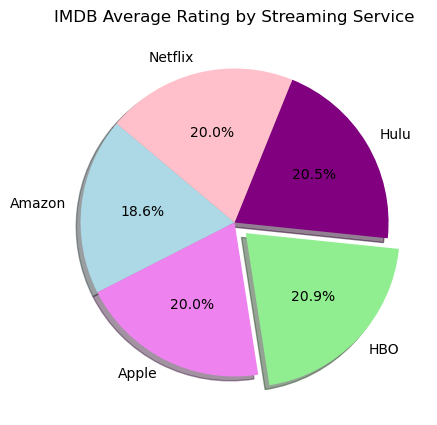

In [75]:
# Create a pie chart of all the streaming services to show which one has the highest average rating IMDB rating
imdb_rating.plot.pie(y="IMDB Average Rating", 
                     labels=imdb_rating["Streaming Service"], 
                     autopct="%1.1f%%", title="IMDB Average Rating by Streaming Service", 
                     figsize=(5, 5), legend=False, shadow=True, explode=(0, 0, 0.1, 0, 0), 
                     startangle=140, colors=["lightblue", "violet", "lightgreen", "purple", "pink"]) 
plt.ylabel('')

# Save the pie chart
plt.savefig("Images/IMDB_Average_Rating_by_Streaming_Service.png")

WRITTEN ANALYSIS HERE. 
1. Go into analysis here about the pie chart. Disucss which one has the highest rating. 

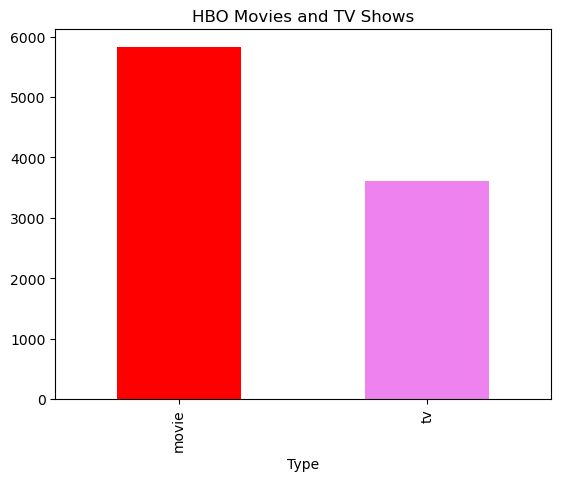

In [76]:
# Create a bar chat to show the number of movies and TV shows for HBO
hbo_data_df["Type"].value_counts().plot(kind="bar", 
                                        title="HBO Movies and TV Shows", 
                                        color=["red", "violet"])

# save the bar chart
plt.savefig("Images/HBO_Movies_and_TV_Shows.png")

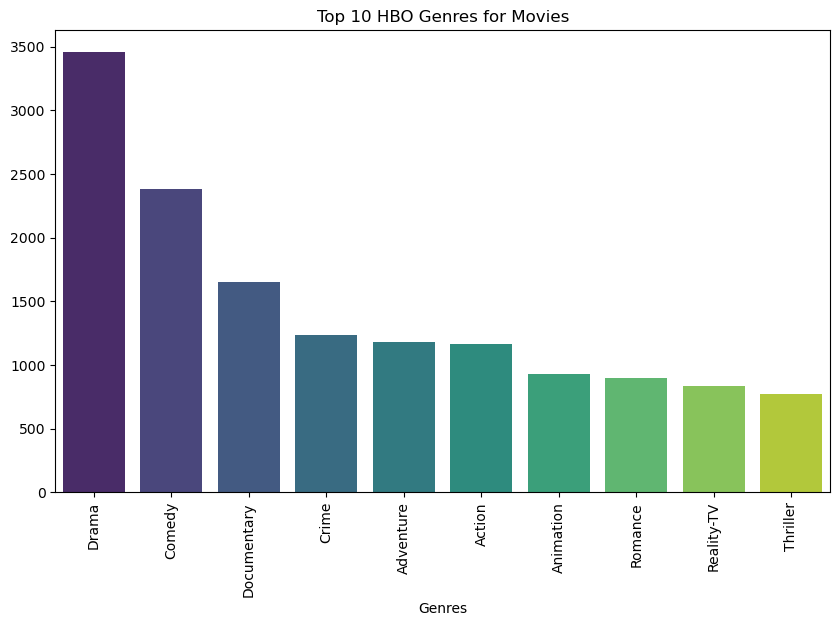

<Figure size 640x480 with 0 Axes>

In [77]:
# Filter the data to include only movies
hbo_movies = hbo_data_df[hbo_data_df['Type'] == 'movie']

# Split the by genres and explode the dataframe so each genre has its own row
hbo_genres = hbo_data_df['Genres'].str.split(', ').explode('Genres')

# Get the top 10 genres in movies for HBO
top_movie_genres = hbo_genres.value_counts().nlargest(10)

# Plot a bar chart for the top ten genres for movies for HBO
plt.figure(figsize=(10, 6))
sns.barplot(x=top_movie_genres.index, y=top_movie_genres.values, palette="viridis")
plt.title("Top 10 HBO Genres for Movies")
plt.xticks(rotation=90);
plt.show()

# Save the bar chart
plt.savefig("Images/Top_10_HBO_Genres_for_Movies.png")


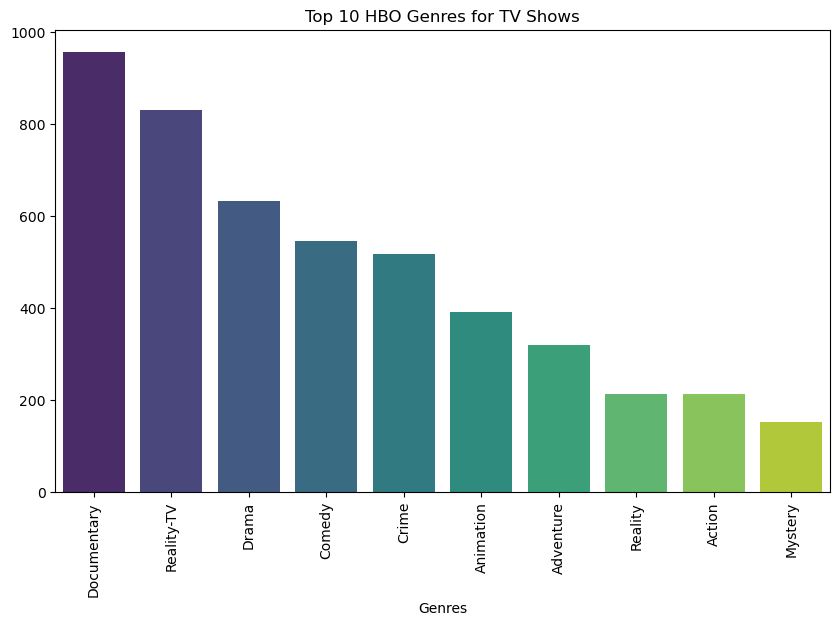

<Figure size 640x480 with 0 Axes>

In [78]:
# Filter the data to include only TV shows
hbo_tv = hbo_data_df[hbo_data_df['Type'] == 'tv']

# Split the genres and explode the dataframe so each genre has its own row
hbo_tv_genres = hbo_tv['Genres'].str.split(', ').explode('Genres')

# Get the top 10 genres in TV shows for HBO
top_tv_genres = hbo_tv_genres.value_counts().nlargest(10)

# Plot a bar chart for the top ten genres for TV shows for HBO
plt.figure(figsize=(10, 6))
sns.barplot(x=top_tv_genres.index, y=top_tv_genres.values, palette="viridis")
plt.title("Top 10 HBO Genres for TV Shows")
plt.xticks(rotation=90)
plt.show()

# Save the bar chart
plt.savefig("Images/Top_10_HBO_Genres_for_TV_Shows.png")

WRITTEN ANALYSIS HERE FOR HBO 
1. Discuss the bar chart and which one is most popular out of tv or movies. Why? 
2. Discuss HBO movies by genre. Which genre is most popular. 

**Analyzing Netflix Data**

    Here, we will be looking at Netflix data to see how the streaming service can improve in the future and what aspects to look at regarding users, age groups, number of movies and shows. 

    Mention how Netflix is the most downloaded streaming service app (July 2024) but it is failing in regards to content, resulting in a downfall in customer sastification. 

In [79]:
# Load new CSV file
netflix_userbase = Path("Netflix_data/Netflix_Userbase.csv")

# Read the CSV file into a DataFrame
netflix_userbase_df = pd.read_csv(netflix_userbase)
netflix_userbase_df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone


In [80]:
# What we want to look at 

# Demoqraphic information
# 1. Gender distribution of netflix users
# 2. Age distribution of netflix users
# 3. Location of netflix users (country)
# 3. Devices used   



Demographic information on Netflix users

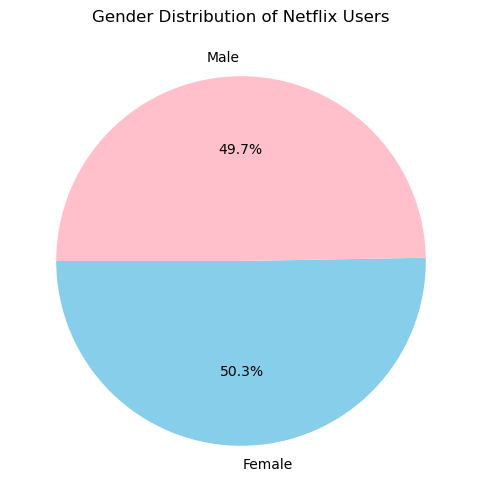

<Figure size 640x480 with 0 Axes>

In [81]:
# Gender distribution of Netflix users
gender_distribution = netflix_userbase_df['Gender'].value_counts()

# Create a pie chart for the gender distribution of Netflix users
gender_distribution.plot.pie(labels=gender_distribution.index, autopct='%1.1f%%', 
                             title='Gender Distribution of Netflix Users', 
                             figsize=(6, 6), legend=False, startangle=180, 
                             colors=['skyblue', 'pink'])
plt.ylabel('')

# Show the plot
plt.show()

# Save the pie chart
plt.savefig("Images/Gender_Distribution_of_Netflix_Users.png")

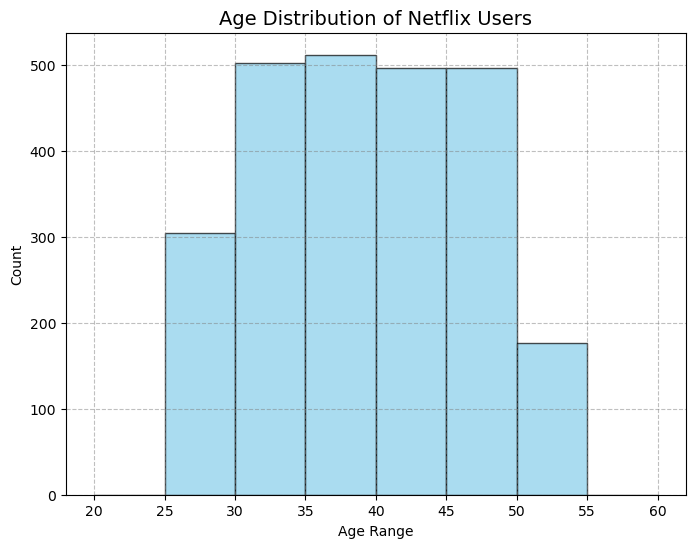

<Figure size 640x480 with 0 Axes>

In [104]:
# Create the histogram for the age distribution of Netflix users
plt.figure(figsize=(8, 6))
plt.hist(netflix_userbase_df['Age'], bins=range(20, 65, 5), color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.title('Age Distribution of Netflix Users', fontsize=14)
plt.xlabel('Age Range', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(range(20, 65, 5))

# Show the plot
plt.grid(color='gray', linestyle='--', alpha=0.5)
plt.show()

# Save the histogram
plt.savefig("Images/Age_Distribution_of_Netflix_Users.png")

In [84]:
# Create a DataFrame for the country counts
country_counts = netflix_userbase_df['Country'].value_counts().reset_index(name='Count')
country_counts.columns = ['Country', 'Count']

# Create a bubble map using Plotly
fig = px.scatter_geo(country_counts, locations="Country", locationmode='country names', size="Count", hover_name="Country", title="Netflix Users by Country", projection="natural earth")

# Show the plot
fig.show()

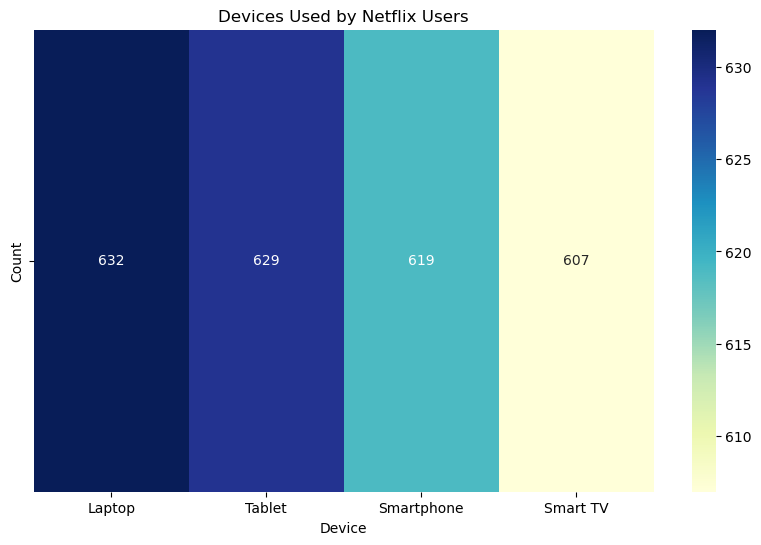

<Figure size 640x480 with 0 Axes>

In [101]:
# Devices used by Netflix users
device_distribution = netflix_userbase_df['Device'].value_counts().reset_index()
device_distribution.columns = ['Device', 'Count']

# Create a heat map for the devices used
plt.figure(figsize=(10, 6))
sns.heatmap(device_distribution.set_index('Device').T, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Devices Used by Netflix Users')
plt.xlabel('Device')
plt.ylabel('')

# Show the plot
plt.show()

# Save the heat map
plt.savefig("Images/Devices_Used_by_Netflix_Users.png")

In [86]:
# This is where we will take a new data set of the most popular streaming service. 
# Hopefully here we can figure out why is is most popular based on the number of accounts. Or gender of the accounts.
# What is the avg plan duration 
# What is the avg plan cost
# What is the avg age of the accounts
# What was the peak year growth of the streaming service. Why? Go into disucssion in the written analysis. 

Membership Analysis of Netflix Users

In [ ]:
# Membership 
# 1. Figure out membership length of Netflix users (join date vs last payment date)
# 2. Membership subscription plan (standard vs basic vs premium)

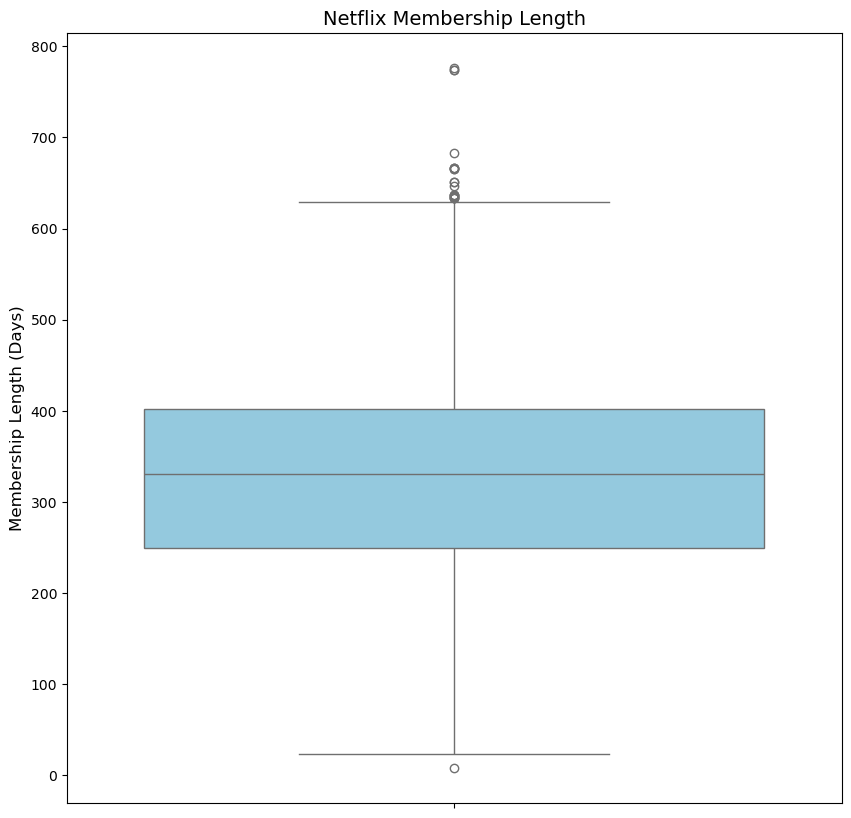

<Figure size 640x480 with 0 Axes>

In [102]:
# Analyze the membership length of Netflix users
netflix_userbase_df['Join Date'] = pd.to_datetime(netflix_userbase_df['Join Date'])
netflix_userbase_df['Last Payment Date'] = pd.to_datetime(netflix_userbase_df['Last Payment Date'])

# Calculate the membership length
netflix_userbase_df['Membership Length'] = netflix_userbase_df['Last Payment Date'] - netflix_userbase_df['Join Date']
netflix_userbase_df['Membership Length'] = netflix_userbase_df['Membership Length'].dt.days

# Filter out negative membership lengths
netflix_userbase_df = netflix_userbase_df[netflix_userbase_df['Membership Length'] >= 0]

# Create a box and whisker plot for the membership length of Netflix users
plt.figure(figsize=(10, 10))
sns.boxplot(y=netflix_userbase_df['Membership Length'], color='skyblue')
plt.title('Netflix Membership Length', fontsize=14)
plt.ylabel('Membership Length (Days)', fontsize=12)

# Show the plot
plt.show()

# Save the box and whisker plot
plt.savefig("Images/Netflix_Membership_Length.png")


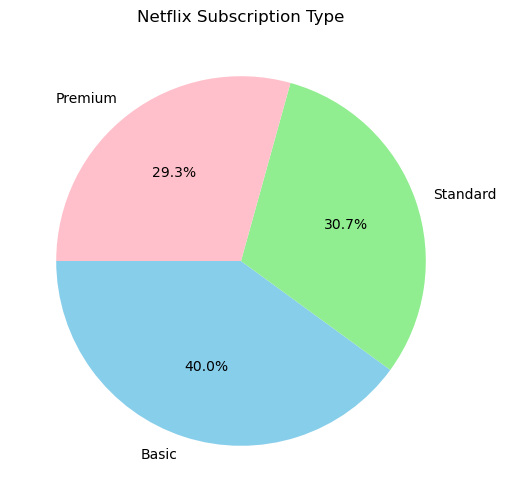

<Figure size 640x480 with 0 Axes>

In [103]:
# Analyze the subscription plan of Netflix users
subscription_plan = netflix_userbase_df['Subscription Type'].value_counts().reset_index()
subscription_plan.columns = ['Subscription Type', 'Count']

# Create a pie chart for the subscription plan of Netflix users
subscription_plan.plot.pie(y='Count', labels=subscription_plan['Subscription Type'], autopct='%1.1f%%', 
                          title='Netflix Subscription Type', figsize=(6, 6), legend=False, startangle=180, 
                          colors=['skyblue', 'lightgreen', 'pink'])
plt.ylabel('')
plt.show()

# Save the pie chart
plt.savefig("Images/Netflix_Subscription_Type.png")

WRITTEN ANALYSIS HERE. 
1. answer quesitons above based on data (plan duration, cost, age, gender, peak growth year)

In [ ]:
# Use GeoApify API to get the location of the streaming services and do a density plot for the most popular streaming to figure out where in the world it is the most popular